# IMDB Review 


In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import re

from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

## Importing dataset

In [15]:
df=pd.read_csv('IMDB Dataset.csv')

In [16]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [17]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [18]:
df.shape

(50000, 2)

### Checking null values

In [19]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [20]:
df['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

Data is balanced

## Visualizing data

<AxesSubplot:xlabel='sentiment', ylabel='count'>

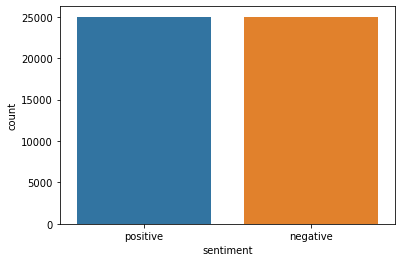

In [21]:
sns.countplot(x='sentiment',data=df)

In [22]:
from wordcloud import WordCloud
def plot_img(img):
    plt.figure(dpi=200)
    plt.imshow(img)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

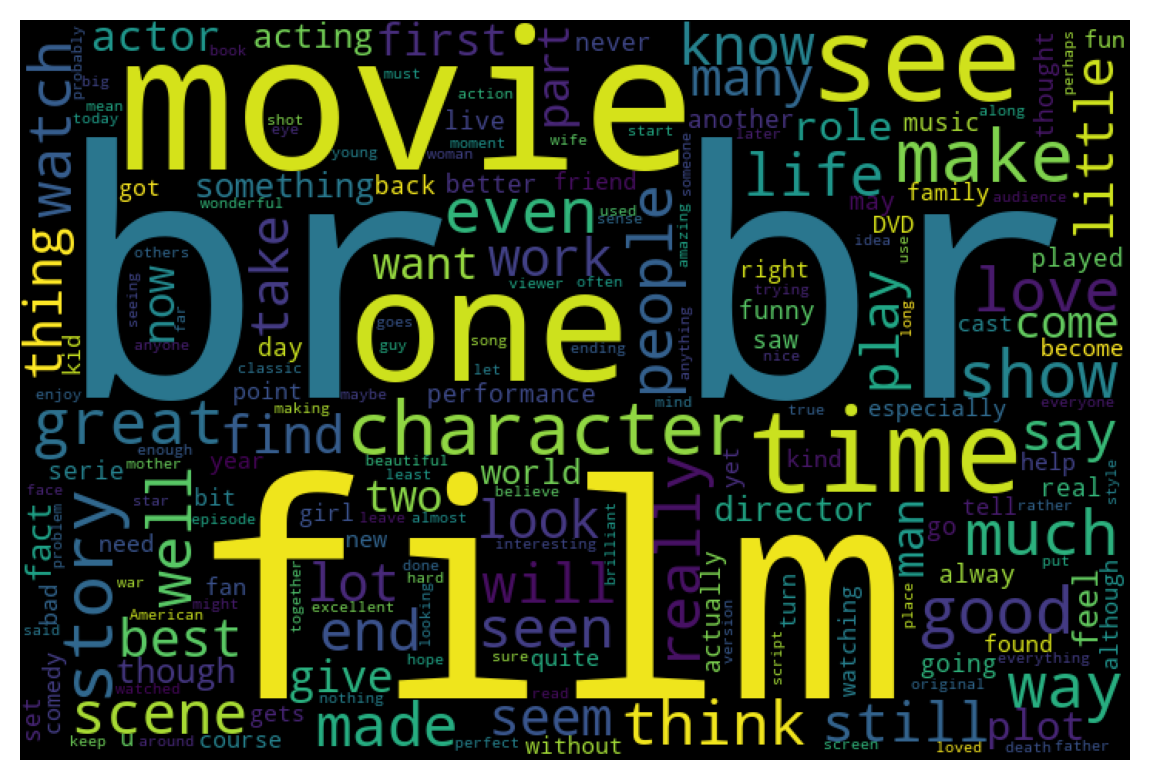

In [23]:
positive_sentiment = " ".join(df[df['sentiment'] == 'positive']['review'])
positive_wordcloud = WordCloud(width=720, height=480).generate(positive_sentiment)
plot_img(positive_wordcloud)

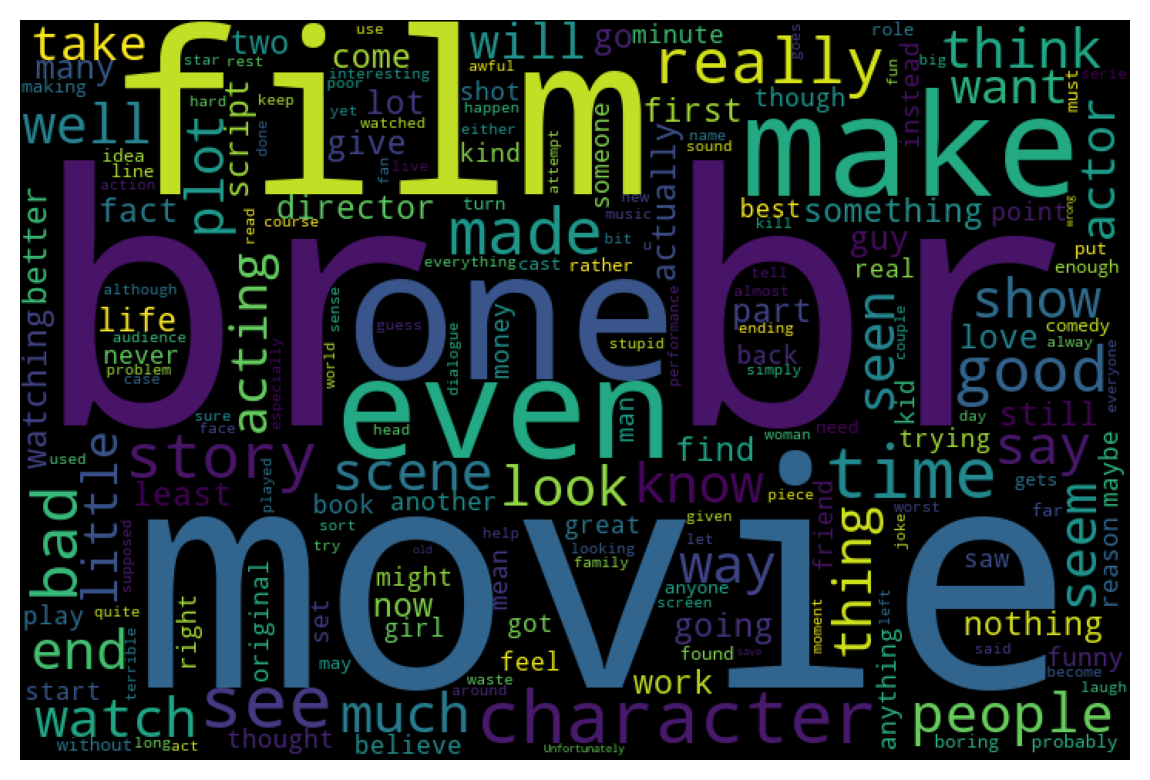

In [24]:
negative_sentiment = " ".join(df[df['sentiment'] == 'negative']['review'])
negative_wordcloud = WordCloud(width=720, height=480).generate(negative_sentiment)
plot_img(negative_wordcloud)

## Data preprocessing

In [25]:
import nltk
from nltk.corpus import stopwords
import re

from nltk.stem.porter import PorterStemmer
def clean_data(review):
    ps = PorterStemmer()
    review = review.lower()
    expr = re.compile(r'[^0-9A-Za-z]')
    review = re.sub(expr,' ',review)
    review = re.sub(r"\s+", ' ',review)
    review = re.sub(r"br", ' ',review)
    stopwords = nltk.corpus.stopwords.words('english') 
    review = " ".join([ ps.stem(word) for word in review.split() if word not in stopwords])
    return review

In [26]:
df['review']=df['review'].apply(clean_data)

In [27]:
df.head()

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['review'])

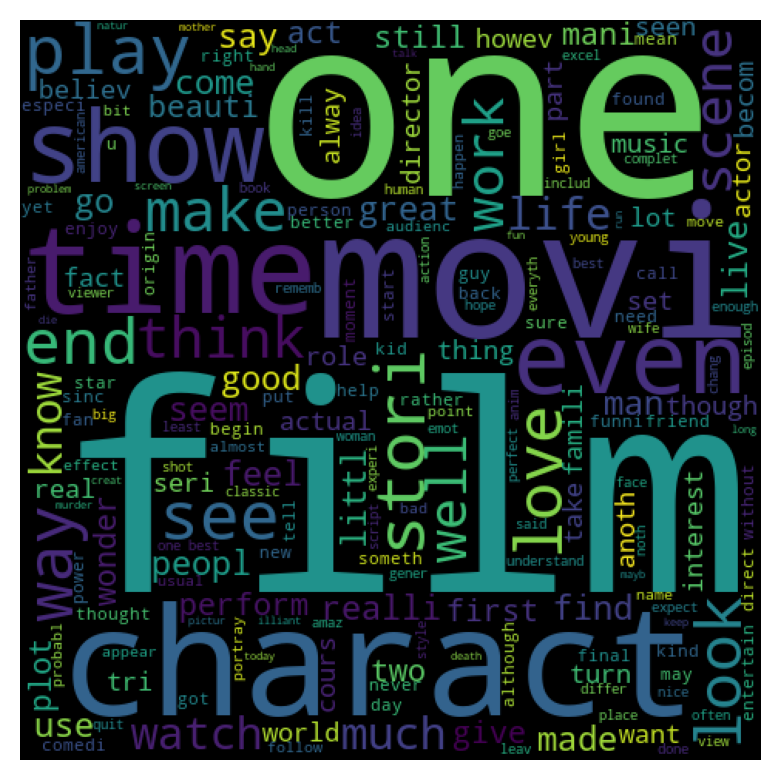

In [58]:
positive_sentiment = " ".join(df[df['sentiment'] == 'positive']['review'])
positive_wordcloud = WordCloud(width=480, height=480).generate(positive_sentiment)
plot_img(positive_wordcloud)

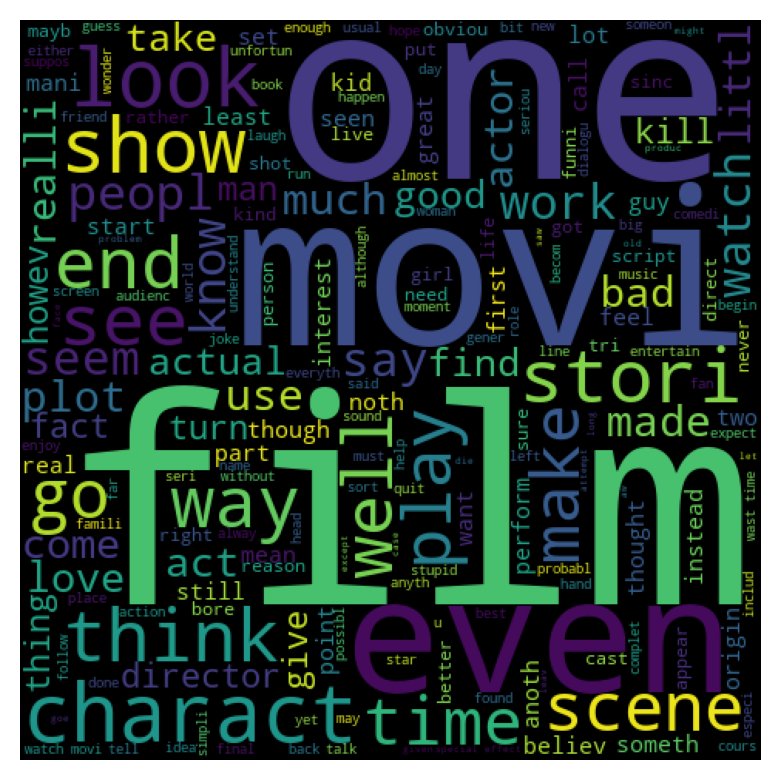

In [57]:
negative_sentiment = " ".join(df[df['sentiment'] == 'negative']['review'])
negative_wordcloud = WordCloud(width=480, height=480).generate(negative_sentiment)
plot_img(negative_wordcloud)

In [29]:
X.shape

(50000, 70345)

In [30]:
y=pd.get_dummies(df['sentiment'])
y=y.iloc[:,1].values

Positive =1 
Negative =0

In [31]:
y 

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

### Spliting data in traing and testing set

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
X_train

<37500x70345 sparse matrix of type '<class 'numpy.int64'>'
	with 3523132 stored elements in Compressed Sparse Row format>

## NLP

In [34]:
review_test = MultinomialNB().fit(X_train, y_train)
y_pred=review_test.predict(X_test)

In [35]:
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [43]:
print(confusion_matrix(y_test,y_pred))

[[5417  794]
 [ 973 5316]]


In [44]:
accuracy_score(y_test,y_pred)

0.85864

## SGD model

In [45]:
from sklearn.linear_model import SGDClassifier

In [46]:
sgd = SGDClassifier()

In [47]:
sgd.fit(X_train,y_train)

SGDClassifier()

In [49]:
y_pred_sgd = sgd.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred_sgd)

0.87624

In [55]:
print(confusion_matrix(y_test,y_pred_sgd))

[[5422  789]
 [ 758 5531]]


### The accuracy socre is higher in case of SGD model 
